# Soft thresholding

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

We first construct a sparse $\theta$ of length 50. Among the components, five are nonzero, with a mean equal to some integer in $[1,4]$ and a standard deviation of 0.5.

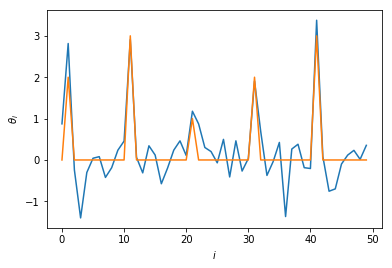

In [2]:
theta = np.zeros(50)
noiseless_theta = np.zeros(50)
for i in range(50):
    if i % 10 == 1:
        theta[i] = i%3 + 1
        noiseless_theta[i] = i%3 + 1
    theta[i] += scipy.stats.norm.rvs(0,0.5)

        
plt.figure()

plt.plot(theta)
plt.plot(noiseless_theta)
plt.ylabel(r'$\theta_i$')
plt.xlabel(r'$i$')
plt.show()

Using our soft threshhold function, we compute our estimates of $\theta$, with different parameters $\lambda$.

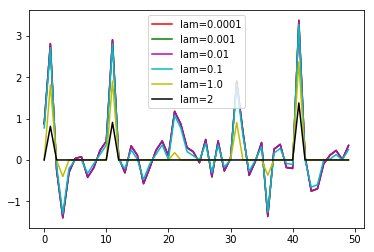

In [3]:
def soft_thresh(theta, lam):
    return np.sign(theta) * np.maximum(np.absolute(theta) - lam, np.zeros(np.shape(theta)))

theta_e = []
lambdas = [1e-4, 1e-3, 1e-2, 0.1, 1.0, 2]
for lam in lambdas:
    theta_e.append(soft_thresh(theta,lam))

colors = "rgmcyk"

for x in range(len(lambdas)):
    plt.plot(range(len(theta)), theta_e[x], c=colors[x], label='lam=' + str(lambdas[x]))

plt.legend()
plt.show()

We compute mean squared error for different $\lambda$.

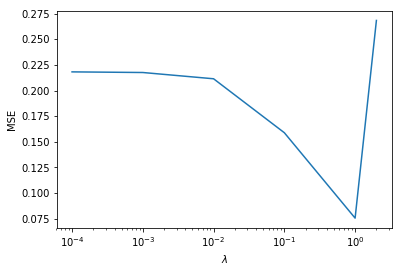

In [5]:
errors = []
for x in range(len(lambdas)):
    err = np.mean(np.square(theta_e[x] - noiseless_theta))
    errors.append(err)

plt.plot(lambdas, errors)
plt.ylabel('MSE')
plt.xlabel(r'$\lambda$')
plt.xscale('log')
plt.show()